# Creating training and testing dataset of neurodegenerative disease data
In this notebook, a numpy dataset will be built from the files previously processed in the last notebook. Each example or data point will consist of a spectrogram of the gait (which is essentially a matrix) signal and a label indicating the disease to which the spectrogram corresponds

<span style="color:red; font-weight: bold;">Note (24/3/2019): new dataset generated with 34x34 spectrograms to try out resnet</span>

<span style="color:red; font-weight: bold;">Note (26/3/2019): first records and segments with weird behaviour have already been discarded in previous steps</span>

<span style="color:red; font-weight: bold;">Note (26/3/2019): Additional arrays with the names of the segments (Unicode strings) corresponding to each training and testing example has been created and saved</span>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

Now the training and test set will be built. One patient (that is, all of the segments corresponding to one patient) from each of the four disease cases will make up the test set.

In [2]:
np.random.seed(3)

als_test = np.random.randint(1, 14)
control_test = np.random.randint(1, 17)
hunt_test = np.random.randint(1, 21)
park_test = np.random.randint(1, 16)

print('ALS patient for test set:', als_test)
print('Huntington\'s patient for test set:', hunt_test)
print('Parkinson\'s patient for test set:', park_test)
print('Control subject for test set:', control_test)

ALS patient for test set: 11
Huntington's patient for test set: 4
Parkinson's patient for test set: 9
Control subject for test set: 9


Although training and evaluation of the model will be done using the spectrogram as input and the disease as target label, it might be interesting to keep other types of information for each data point. Therefore, an additional array is built containing the segment name for each data point, which encodes the disease, patient and segment number. This will also be useful when evaluating the model, in order to visualize the signal for example.

In [28]:
test_filenames = ['als'+str(als_test),
                 'hunt'+str(hunt_test),
                 'control'+str(control_test),
                 'park'+str(park_test)]

classes = {
    'control': 0,
    'als': 1,
    'hunt': 2,
    'park': 3}

test_spectrograms = []
test_labels = []
train_spectrograms = []
train_labels = []
test_info = []
train_info = []

rootdir = os.pardir
in_dir = os.path.join(rootdir, 'data/interim/spectrograms')

for in_filename in os.listdir(in_dir):
    record_name = in_filename.split('_')[0]
    # load npz file
    data = np.load(os.path.join(in_dir, in_filename))
    # load spectrogram and flip it
    Sxx = data['Sxx']
    Sxx = np.flip(Sxx, 0)
    # get label from record name
    disease_match = re.match(r'[a-z]+', record_name)
    disease = disease_match[0]
    label = classes[disease]
    # get segment name
    segment_name = in_filename[:-4]
    
    if record_name in test_filenames:
        test_spectrograms.append(Sxx)
        test_labels.append(label)
        test_info.append(segment_name)
    
    else:
        train_spectrograms.append(Sxx)
        train_labels.append(label)
        train_info.append(segment_name)

X_test = np.asarray(test_spectrograms)
Y_test = np.asarray(test_labels)
Y_test = Y_test.reshape((Y_test.shape[0], 1))
Z_test = np.asarray(test_info)
Z_test = Z_test.reshape((Z_test.shape[0], 1))

X_train = np.asarray(train_spectrograms)
Y_train = np.asarray(train_labels)
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Z_train = np.asarray(train_info)
Z_train = Z_train.reshape((Z_train.shape[0], 1))

In [53]:
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of X_train: {X_train.shape}')

print(f'Shape of Y_test: {Y_test.shape}')
print(f'Shape of Y_train: {Y_train.shape}')

print(f'Shape of Z_test: {Z_test.shape}')
print(f'Shape of Z_train: {Z_train.shape}')

Shape of X_test: (72, 11, 34)
Shape of X_train: (1032, 11, 34)
Shape of Y_test: (72, 1)
Shape of Y_train: (1032, 1)
Shape of Z_test: (72, 1)
Shape of Z_train: (1032, 1)


This is a Control subject spectrogram corresponding to control14_let_7


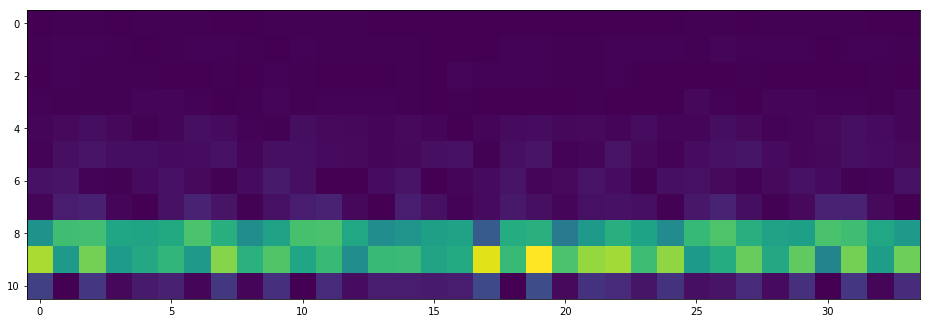

In [50]:
# let's try visualizing the training data once more
diseases_dict = {
    0: 'Control subject',
    1: 'ALS',
    2: 'Huntington\'s disease',
    3: 'Parkinson\'s disease'}

example = np.random.randint(0, Y_train.shape[0])
label = Y_train[example][0]
segment_name = Z_train[example][0]
disease = diseases_dict[label]

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(X_train[example,:,:], interpolation='none')
print(f'This is a {disease} spectrogram corresponding to {segment_name}')
# the y-axis does not correspond to frequencies

In [51]:
out_dir = os.path.join(rootdir, 'data/processed')

np.savez(os.path.join(out_dir, 'train.npz'), X_train = X_train, Y_train = Y_train, Z_train = Z_train)
np.savez(os.path.join(out_dir, 'test.npz'), X_test = X_test, Y_test = Y_test, Z_test = Z_test)